# <span style="color:#336699">CAP-351 - Neurocomputação
<hr style="border:1px solid #0077b9;">

Professor:
- Mascos G. Quiles

Discente:
- Camila P. Sales

## Atividade

- Realizar testes com 3(ou mais) datasets selecionados do repositório da UCI (iris, etc...) para várias configuração da rede
- Ilustrar graficamente o processo de aprendizagem pela redução do erro quadrático médio
- Dividir o conjunto em duas partes (Treino e Validação)
- Entregar um relatório descrevendo os experimentos

### Considerar
- Impacto do termo de momentum
<br>
- Impacto da regularização L2

#### Datasets selecionados
 - Detecção de ocupação https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
 - Padrão de clientes de cartão de crédito https://archive.ics.uci.edu/ml/machine-learning-databases/00350/
 - Avila https://archive.ics.uci.edu/ml/datasets/Avila

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from livelossplot.keras import PlotLossesCallback
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras import regularizers

Using TensorFlow backend.


In [2]:
df = pd.read_csv( "../data/winequality-red.csv", sep=";" );
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
X = df.drop('quality',axis=1)
y = df['quality'].to_numpy()

# Dividir os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
plot_losses = PlotLossesCallback()

In [5]:
model = Sequential()


model.add(Dense(64, input_dim=11, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax',kernel_regularizer=regularizers.l2(0.01)))


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.60, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy','mean_squared_error'
])

Instructions for updating:
Colocations handled automatically by placer.


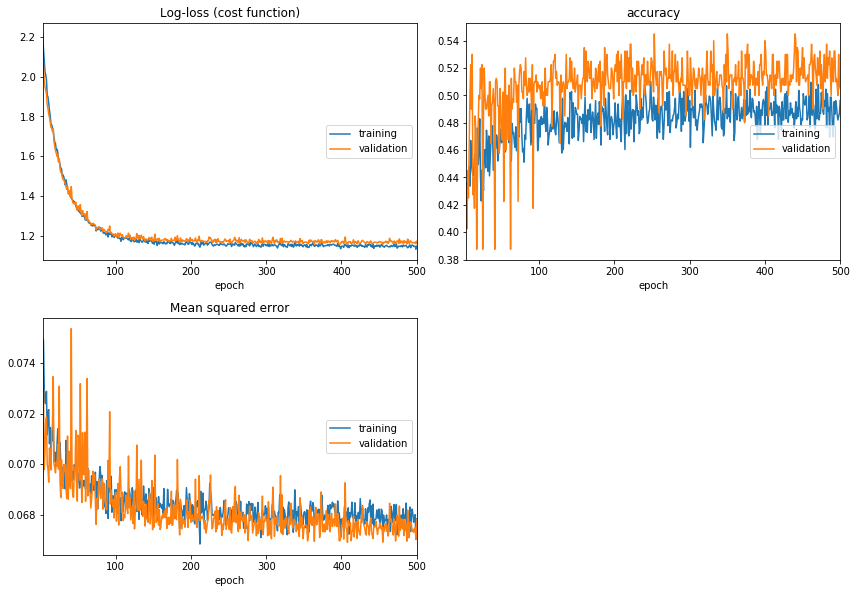

Log-loss (cost function):
training   (min:    1.135, max:    3.796, cur:    1.151)
validation (min:    1.160, max:    2.247, cur:    1.175)

accuracy:
training   (min:    0.360, max:    0.510, cur:    0.496)
validation (min:    0.387, max:    0.545, cur:    0.505)

Mean squared error:
training   (min:    0.067, max:    0.099, cur:    0.068)
validation (min:    0.067, max:    0.075, cur:    0.068)
400/400 [==============================] - 0s 10us/step


In [6]:
history = model.fit(X_train, y_train,
          epochs=500,
          validation_data=(X_test, y_test),
          callbacks=[plot_losses],
          verbose=0)
score = model.evaluate(X_test, y_test, batch_size=128)